In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')



In [5]:
train_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


##  Data Cleaning And EDA



In [1]:
# Lets cale the column more organize my making  them lowecases
train_df.columns=train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()



NameError: name 'train_df' is not defined

In [8]:
# Dataset info and statistics
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5898 non-null   int64  
 1   loan_id            5898 non-null   object 
 2   gender             5898 non-null   int64  
 3   married            5898 non-null   int64  
 4   dependents         5898 non-null   object 
 5   education          5898 non-null   int64  
 6   self_employed      5898 non-null   int64  
 7   applicantincome    5898 non-null   int64  
 8   coapplicantincome  5898 non-null   float64
 9   loanamount         5898 non-null   int64  
 10  loan_amount_term   5898 non-null   int64  
 11  credit_history     5898 non-null   int64  
 12  property_area      5898 non-null   int64  
 13  loan_status        5898 non-null   int64  
 14  total_income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [9]:
train_df.describe()

,id,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [10]:
# Gender value_counts
print(f"Gender count: {train_df.gender.value_counts()}")
print("---\n")

# Married
print(f"Married count: {train_df.married.value_counts()}")
print("---\n")

# Dependent
print(f"Gender count: {train_df.dependents.value_counts()}")
print("---\n")

# Education
print(f"Gender count: {train_df.education.value_counts()}")
print("---\n")

# Self employed
print(f"Gender count: {train_df.self_employed.value_counts()}")
print("---\n")

# property area
print(f"Gender count: {train_df.property_area.value_counts()}")
print("---\n")

Gender count: gender
1    5372
0     526
Name: count, dtype: int64
---

Married count: married
1    5040
0     858
Name: count, dtype: int64
---

Gender count: dependents
0     3659
1     1157
3+     546
2      536
Name: count, dtype: int64
---

Gender count: education
0    5189
1     709
Name: count, dtype: int64
---

Gender count: self_employed
0    5263
1     635
Name: count, dtype: int64
---

Gender count: property_area
1    2551
2    2216
0    1131
Name: count, dtype: int64
---



### Univarate Analysis

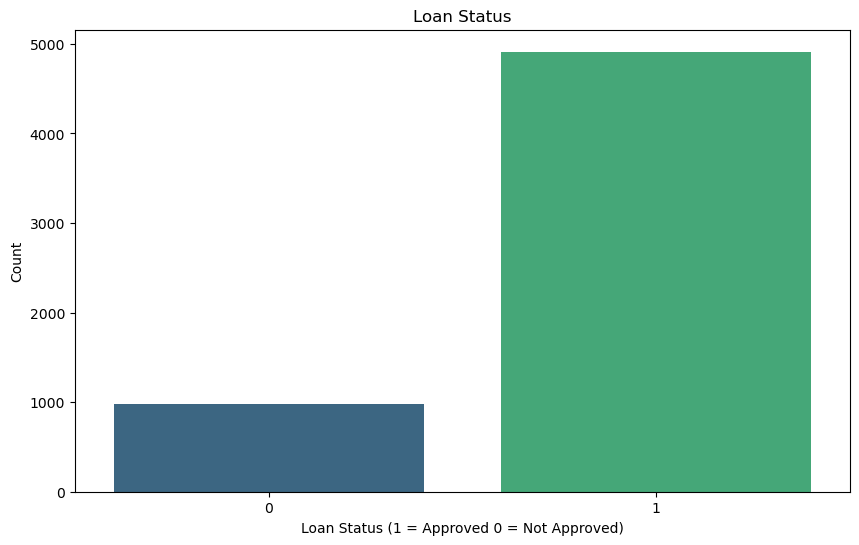

In [12]:
# Visualization of Loan status
plt.figure(figsize=(10,6));
sns.countplot(data=train_df, x='loan_status', palette='viridis');
plt.title("Loan Status")
plt.xlabel("Loan Status (1 = Approved 0 = Not Approved)")
plt.ylabel("Count")
plt.show()

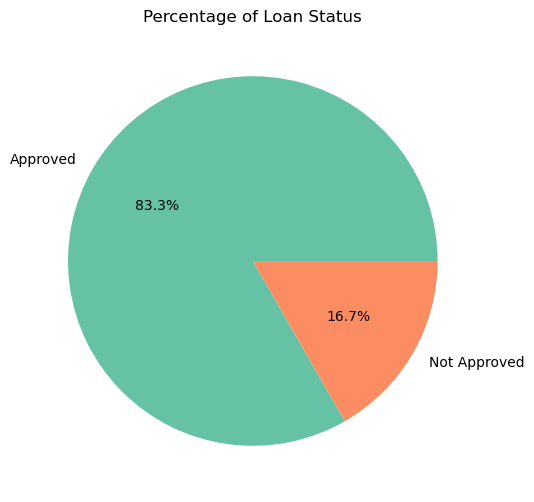

In [13]:
# Pie chat to plot percentage
loan_status_count = train_df['loan_status'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(loan_status_count, labels=['Approved','Not Approved'], autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title("Percentage of Loan Status")
plt.show()

**OBSERVATION**

There are less number of Not approved than approved.
This is a serious issue because it shows that our model is `Imbalanced`
Training on this data might cause biased towards the majority class if we are considering accuracy as the evaluation metric. 

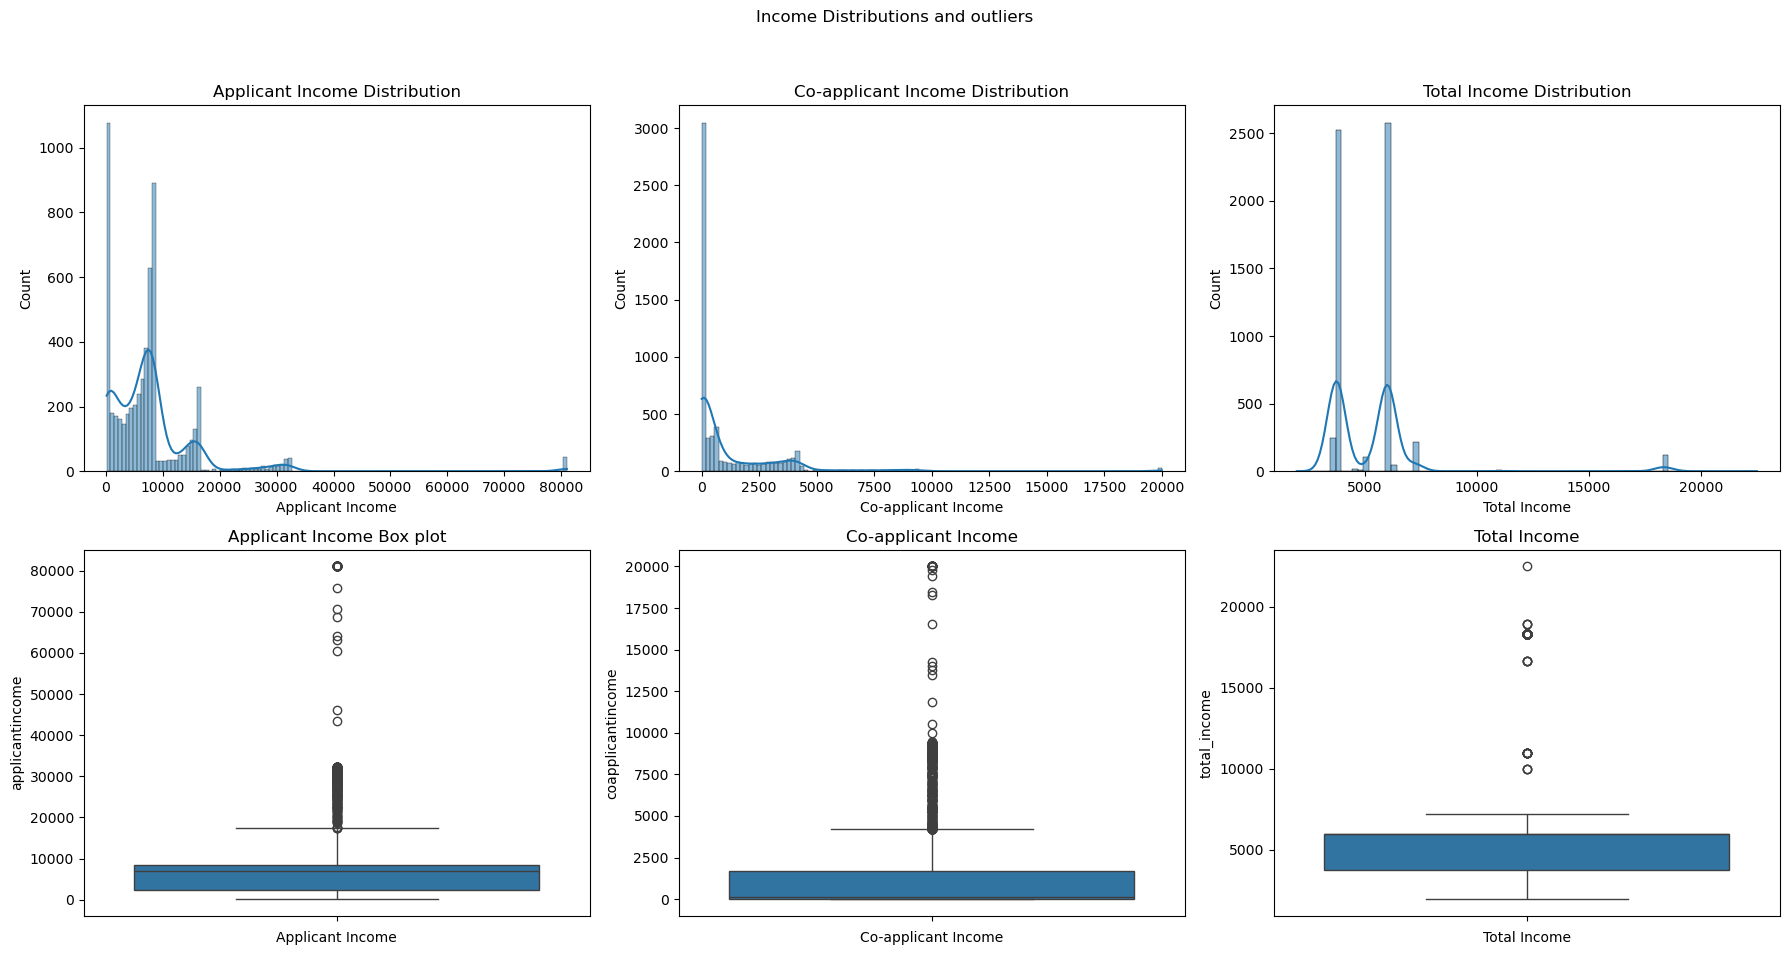

In [15]:
## Distribution of ApplicantIncome, Coapplicant income, and total income 

fig,axes = plt.subplots(2,3,figsize=(18,10))
fig.suptitle("Income Distributions and outliers")

# Histograms
sns.histplot(train_df['applicantincome'], kde=True, ax=axes[0,0])
axes[0,0].set_title("Applicant Income Distribution")
axes[0,0].set_xlabel("Applicant Income")

sns.histplot(train_df['coapplicantincome'], kde=True, ax=axes[0,1])
axes[0,1].set_title("Co-applicant Income Distribution")
axes[0,1].set_xlabel("Co-applicant Income")

sns.histplot(train_df['total_income'], kde=True, ax=axes[0,2])
axes[0,2].set_title("Total Income Distribution")
axes[0,2].set_xlabel("Total Income")

# BOX PLOT

sns.boxplot(train_df['applicantincome'], ax=axes[1,0])
axes[1,0].set_title("Applicant Income Box plot")
axes[1,0].set_xlabel("Applicant Income")

sns.boxplot(train_df['coapplicantincome'], ax=axes[1,1])
axes[1,1].set_title("Co-applicant Income")
axes[1,1].set_xlabel("Co-applicant Income")

sns.boxplot(train_df['total_income'], ax=axes[1,2])
axes[1,2].set_title("Total Income")
axes[1,2].set_xlabel("Total Income")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**OBSERVATIONS:**

**From the histogram**
* Applicant income distribution: Most of the appplicant have a relatively low income with fewer outliers(above 50,000). The distribution is highly skewed to the right.
* Co-applicant income: Most of the co-applicant also have relatively low income with outliers.
* Total Income: Most the applicants have a lower total income and few applicants with high total income

**Feedback**

* The right skew indicates that income distributions are not normally distributed. This could affect model performance. We may want to consider log transformation or scaling these features to make the distribution more normal-like.
* The presence of outliers (the few high-income values) may affect certain algorithms. It’s worth exploring if those outliers have a significant impact on the target variable.


In [17]:
### Applying log transformation
log_transformed_df = pd.DataFrame({
    'applicantincome_log': np.log1p(train_df['applicantincome']),
    'coapplicantincome_log': np.log1p(train_df['coapplicantincome']),
    'total_income_log': np.log1p(train_df['total_income'])
})

log_transformed_df


,applicantincome_log,coapplicantincome_log,total_income_log
0,9.027499,0.000000,8.699681
1,5.017280,8.258023,8.699681
2,8.515191,5.754072,8.699681
3,5.017280,0.000000,8.229778
4,8.994669,0.000000,8.229778
...,...,...,...
5893,7.168580,8.099896,8.229778
5894,8.903679,0.000000,8.174139
5895,5.017280,0.000000,8.229778
5896,7.710205,0.000000,8.229778


Text(0.5, 0, 'Total Income')

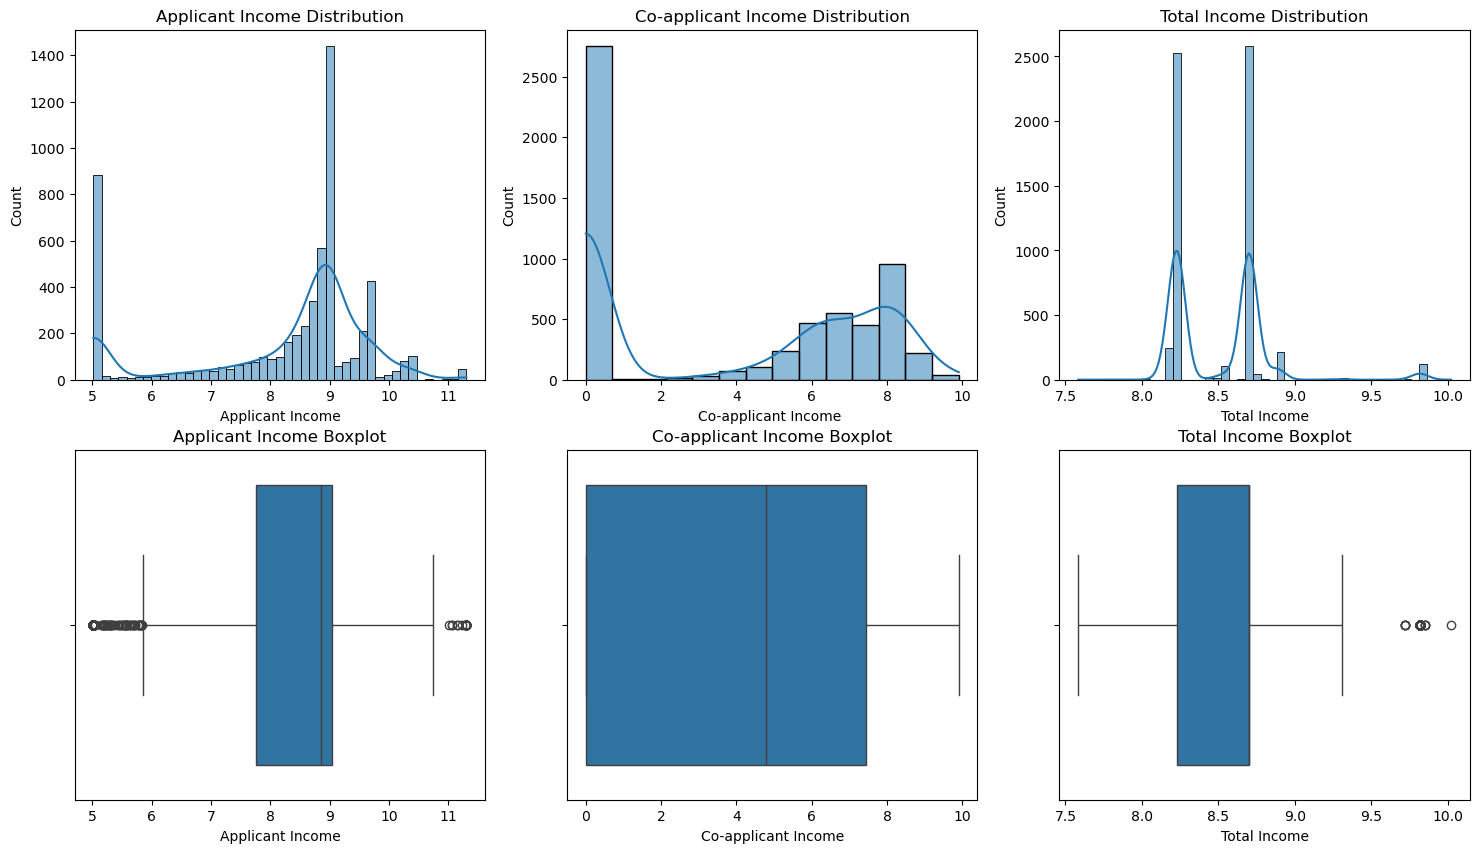

In [18]:
# Let's plot to see how the distrubution will look like now

fig,axes = plt.subplots(2,3, figsize=(18,10))

# Histograms
sns.histplot(log_transformed_df.applicantincome_log, kde=True, ax=axes[0,0])
axes[0,0].set_title("Applicant Income Distribution")
axes[0,0].set_xlabel('Applicant Income')

sns.histplot(log_transformed_df.coapplicantincome_log, kde=True, ax=axes[0,1])
axes[0,1].set_title("Co-applicant Income Distribution")
axes[0,1].set_xlabel("Co-applicant Income ")

sns.histplot(log_transformed_df.total_income_log, kde=True, ax=axes[0,2])
axes[0,2].set_title("Total Income Distribution")
axes[0,2].set_xlabel("Total Income")

# Box plot
sns.boxplot(x=log_transformed_df.applicantincome_log, ax=axes[1,0])
axes[1,0].set_title("Applicant Income Boxplot")
axes[1,0].set_xlabel("Applicant Income")

sns.boxplot(x=log_transformed_df.coapplicantincome_log, ax=axes[1,1])
axes[1,1].set_title("Co-applicant Income Boxplot")
axes[1,1].set_xlabel("Co-applicant Income")

sns.boxplot(x=log_transformed_df.total_income_log, ax=axes[1,2])
axes[1,2].set_title("Total Income Boxplot")
axes[1,2].set_xlabel("Total Income")

**OBSERVATION**

* Applicant_income_log: The distribution is now closer to normal distribution, although there is a little bit of right skewed. The box plot shows that there fewer outliers compared to the original scale.
* Co_applicant_income_log: The distribution shows a little bit of improvement, but a large proportion of values remain close to zero.
  This indicates that many co-applicant have little to no income. The box plot shows minimal outliers, suggesting the log transformation has controlled the spread of values well here.
* Total_income_log: The distribution has two distinct peaks, which might might indicate different income groups. The log transformation has reduced the impact of high-income values, although a few outliers remain in the box plot.


**Feedback**
The log transformation has effectively reduced the influence of extreme values and created a more compact, approximately normal distribution for these income features. This will likely help machine learning models interpret these features more effectively.

In [20]:
# Analysing the impact of the outliers on the target variable
high_income_threshold = 30000
log_transformed_df['high_income_applicant'] = train_df['applicantincome'] > high_income_threshold
log_transformed_df['loan_status'] = train_df['loan_status']


#checking the approval rate among high income applicant
approval_rate = log_transformed_df.groupby('high_income_applicant')['loan_status'].value_counts(normalize=True)
print(approval_rate)

high_income_applicant  loan_status
False                  1              0.832926
                       0              0.167074
True                   1              0.835366
                       0              0.164634
Name: proportion, dtype: float64


**OBSERVATION**
* When HighIncomeApplicant is True, the approval rate is approximately 84%, while the non-approval rate is around 16%.
* When HighIncomeApplicant is False, the approval rate is roughly 83%, and the non-approval rate is around 17%

**Feedback**
the HighIncomeApplicant feature does not seem to have a strong predictive impact on loan approval

Text(0.5, 0, 'Loan Amont')

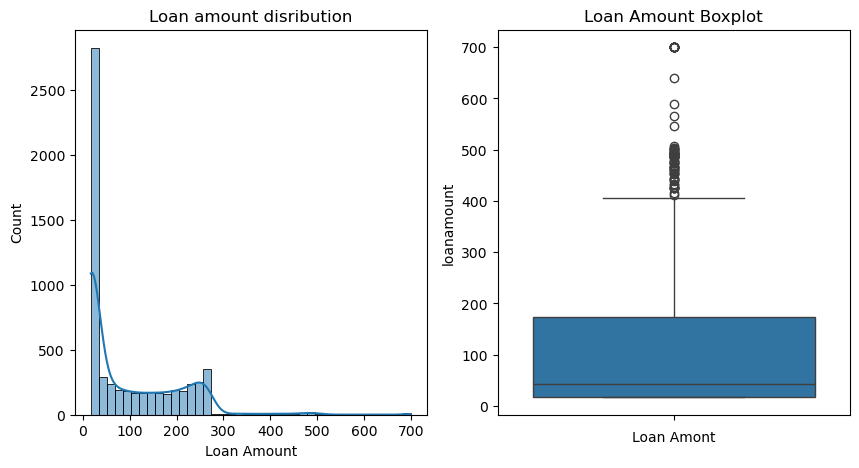

In [22]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

# Histplot
sns.histplot(train_df.loanamount, kde=True,ax=axes[0])
axes[0].set_title("Loan amount disribution")
axes[0].set_xlabel("Loan Amount")

# Boxplot
sns.boxplot(train_df.loanamount, ax=axes[1])
axes[1].set_title("Loan Amount Boxplot")
axes[1].set_xlabel("Loan Amont")


**OBSERVATION**
* The distribution indicates a long tail(right skewed) with the majority of the values concentrated at lower amount.
* There are several outliers which could influence model training it not addressed.

**Feedback** 
A log transformation could help reduce skewness and make the data more normally distributed for better modeling.

In [24]:
log_transformed_df['loanamount_log'] = np.log1p(train_df.loanamount)


Text(0.5, 0, 'Loan Amont')

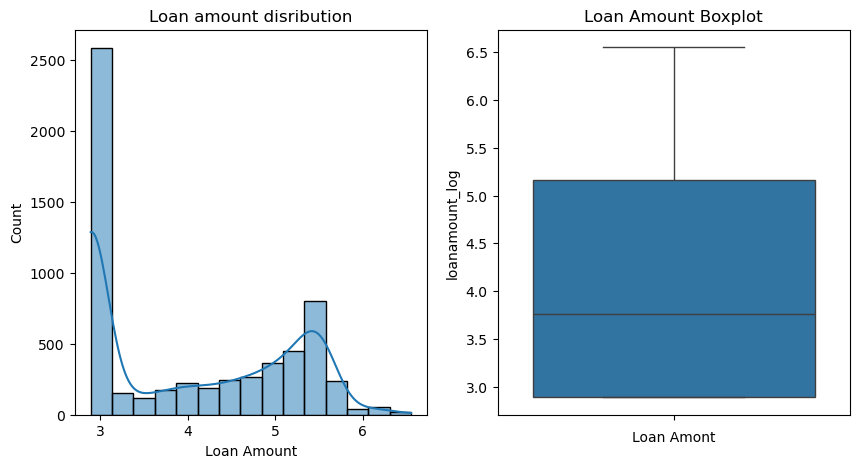

In [25]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

# Histplot
sns.histplot(log_transformed_df.loanamount_log, kde=True,ax=axes[0])
axes[0].set_title("Loan amount disribution")
axes[0].set_xlabel("Loan Amount")

# Boxplot
sns.boxplot(log_transformed_df.loanamount_log, ax=axes[1])
axes[1].set_title("Loan Amount Boxplot")
axes[1].set_xlabel("Loan Amont")


**OBSERVATION**

* After applying log1p, the skewness in the orginal distribution has reduced, the values are now more concentrated and spread out uniformly.
* Outliers (previously seen as points above the whiskers) are less pronounced. The log transformation compresses the data range, making extreme values less impactful.


### Bivariate Analysis

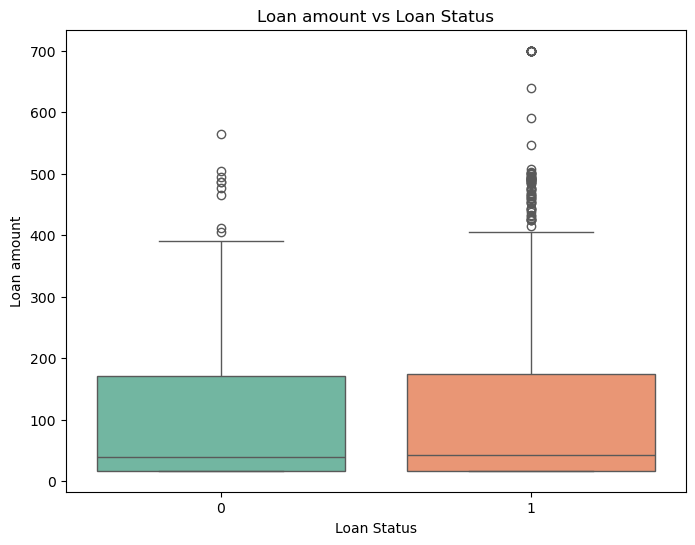

In [28]:
# Comparing loan amount vs loan status
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='loan_status', y='loanamount',palette='Set2')
plt.title("Loan amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan amount")
plt.show()

**OBSERVATIONS**

* The average loan amount appears slighly higher for approved loans compare to the rejected.
* There are many outliers in both categories, representing large loan amounts. However, they don't seem to significantly differ between the categories.

**Feedback**
* Since we already have the transformed version of loan amount. Let's try plotting on it

In [30]:
log_transformed_df['loan_status'] = train_df['loan_status']

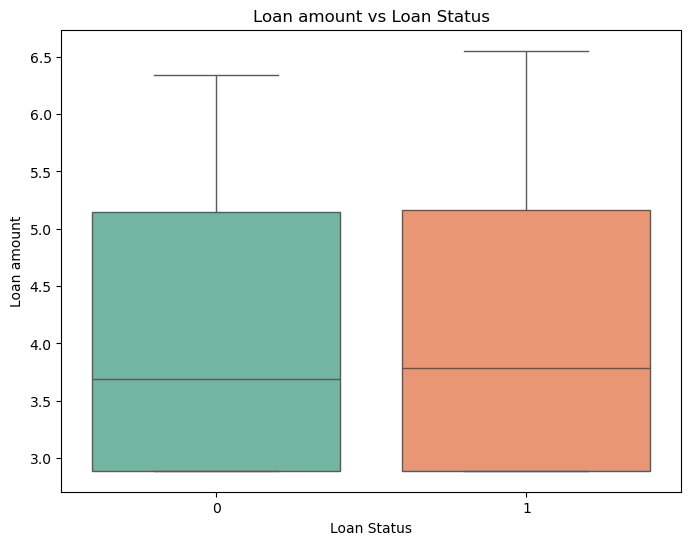

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=log_transformed_df, x='loan_status', y='loanamount_log',palette='Set2')
plt.title("Loan amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan amount")
plt.show()

**OBSERVATION**
The log-transformed plot provides a clearer comparison between the two loan statuses

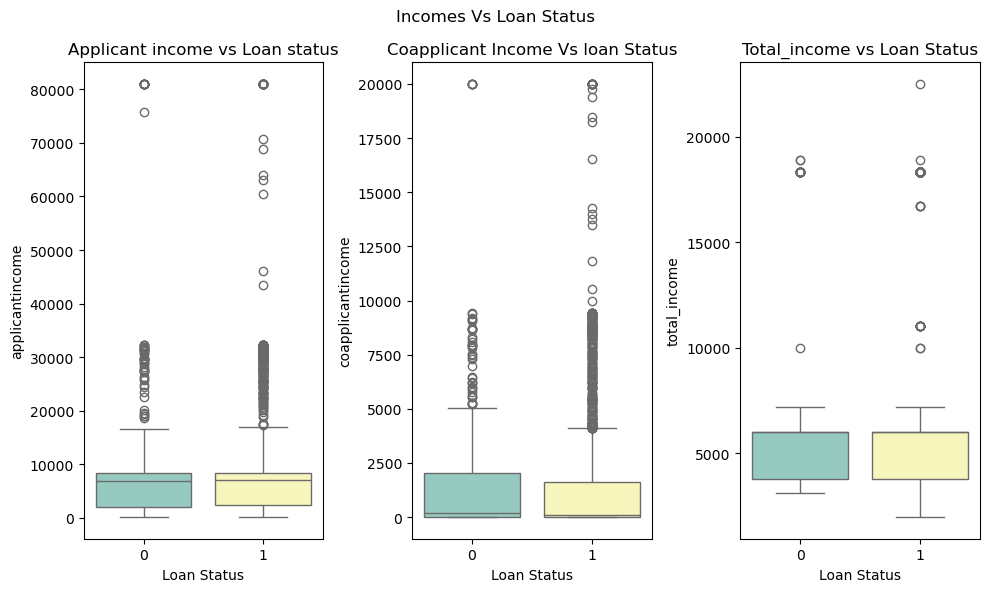

In [33]:
# Comparing income and loan status
incomes = ['applicantincome', 'coapplicantincome','total_income']
titles= ['Applicant income vs Loan status', 'Coapplicant Income Vs loan Status', 'Total_income vs Loan Status']


plt.figure(figsize=(10,6))
plt.suptitle('Incomes Vs Loan Status')
for i, income in enumerate(incomes):
    plt.subplot(1,3, i + 1)
    sns.boxplot(data=train_df, x='loan_status', y=income, palette='Set3')
    plt.title(titles[i])
    plt.xlabel('Loan Status')
    plt.ylabel(income)
plt.tight_layout()
plt.show()

**OBSERVATION**

* It doesn't appear to be a strong visual correlation between incomes and loan status
* All three metrics show considerable outliers

In [35]:
# Dependents vs loan status

dependents_status = train_df.groupby(['dependents','loan_status']).size().unstack()
dependents_status

loan_status,0,1
dependents,,
0,587,3072
1,203,954
2,95,441
3+,100,446


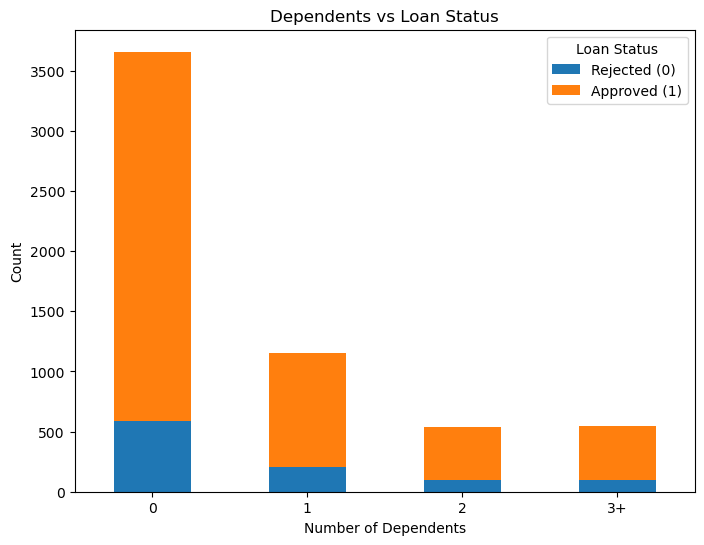

In [36]:
dependents_status.plot(kind='bar',stacked=True,figsize=(8,6))
plt.title('Dependents vs Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(['Rejected (0)', 'Approved (1)'], title='Loan Status')
plt.xticks(rotation=0)
plt.show()

### 

**OBSERVATIONS**
* Dependents with "0": The majority of loan applicants with no dependents have their loans approved.
* Dependents with "1": There is still a higher count of approvals than rejections, but the gap narrows compared to those with no dependents.
* Dependents with "2" and "3+": The trend of higher approvals persists, but these groups show significantly fewer overall applicants compared to those with 0 or 1 dependents.

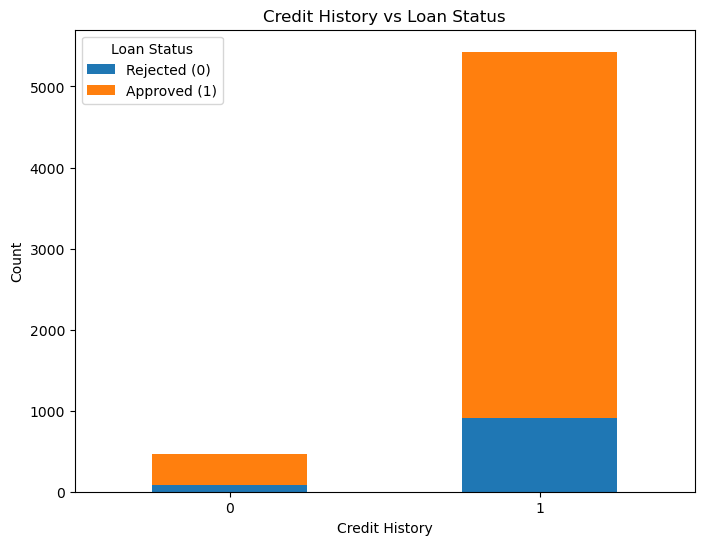

In [39]:
## Credit history vs loan status

credit_history_status = train_df.groupby(['credit_history', 'loan_status']).size().unstack()

# Plot the bar chart
credit_history_status.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(['Rejected (0)', 'Approved (1)'], title='Loan Status')
plt.xticks(rotation=0)
plt.show()


**OBSERVATION**

The approval rate appears significantly higher for those with good credit history

### Multivariate Analysis

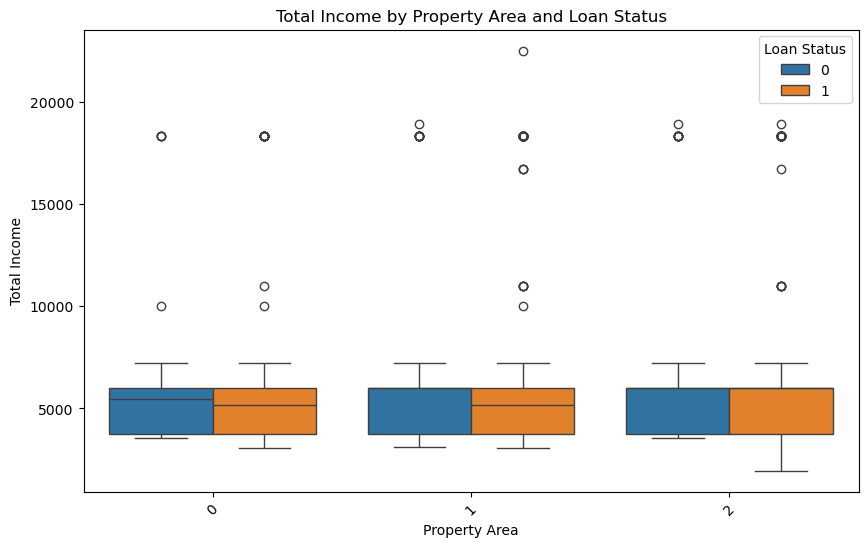

In [42]:
# Property area vs income vs loan status

plt.figure(figsize=(10,6))

sns.boxplot(data=train_df, x='property_area', y='total_income', hue='loan_status')

# Add labels and title
plt.title("Total Income by Property Area and Loan Status")
plt.xlabel("Property Area")
plt.ylabel("Total Income")
plt.legend(title="Loan Status", loc="upper right")
plt.xticks(rotation=45)
plt.show()

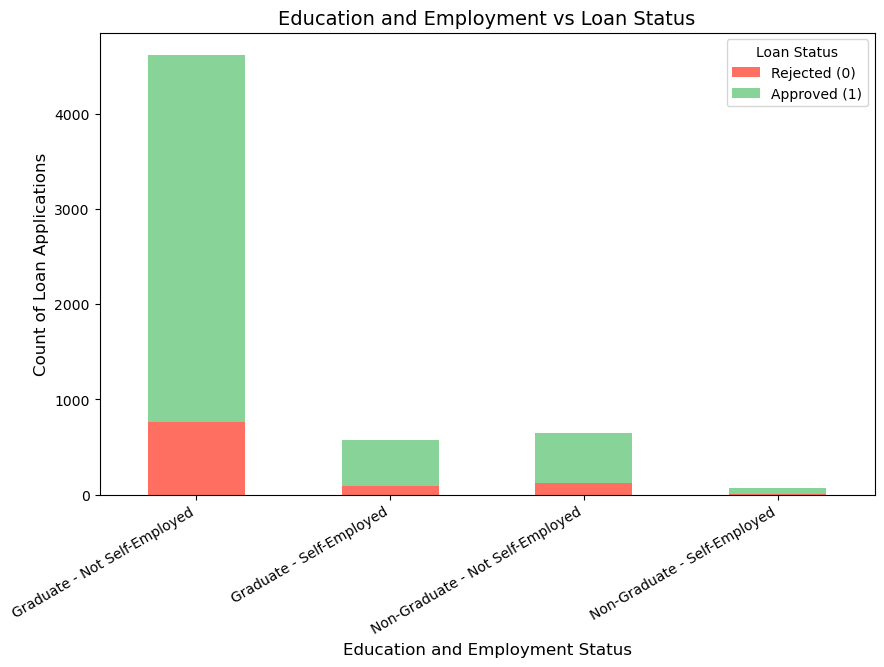

In [43]:
# Education vs employment and loan_status
# Group the data by Education, Self_Employed, and Loan_Status
education_employment_status = train_df.groupby(['education', 'self_employed', 'loan_status']).size().unstack()

# Fix labels for readability
education_labels = {
    (0, 0): "Graduate - Not Self-Employed",
    (0, 1): "Graduate - Self-Employed",
    (1, 0): "Non-Graduate - Not Self-Employed",
    (1, 1): "Non-Graduate - Self-Employed"
}

# Prepare the data for plotting
education_employment_status.index = education_employment_status.index.map(lambda x: education_labels[x])

# Plot the grouped bar chart
education_employment_status.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6F61', '#88D498'])

# Customize the plot
plt.title("Education and Employment vs Loan Status", fontsize=14)
plt.xlabel("Education and Employment Status", fontsize=12)
plt.ylabel("Count of Loan Applications", fontsize=12)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.legend(title="Loan Status", labels=['Rejected (0)', 'Approved (1)'])
plt.show()



**OBSERVATION**

* The Graduate - Not Self-Employed group shows a higher proportion of approved loans (green bar dominates).
* Other groups, like Non-Graduate - Self-Employed, have a small number of applications.

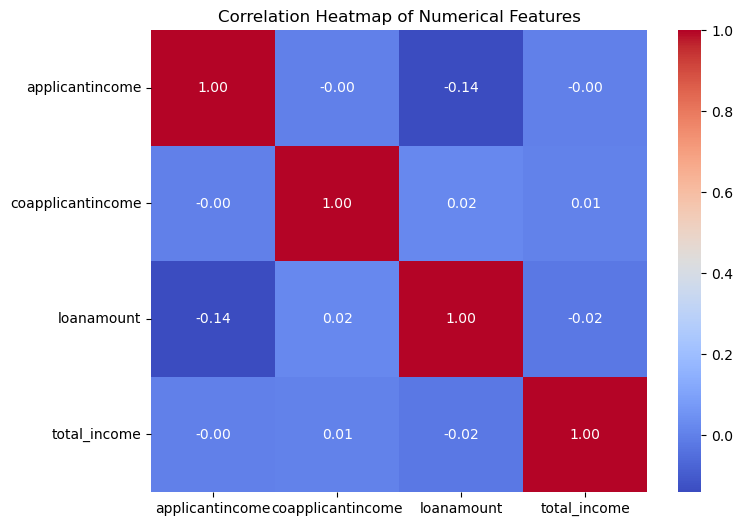

In [45]:

# Select numerical features for correlation analysis
numerical_features = ['applicantincome', 'coapplicantincome', 'loanamount', 'total_income']
correlation_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### Feature Engineering

We have seen the relationships between our features, now let us apply some feature enginering to help our model learn well.
We will apply log1 transformation to the skwed features and also change `loan_amount_term` from days to months.

In [47]:
# Convert loan_amount_term to months
train_df['loan_amount_term'] = (train_df['loan_amount_term'] / 30).round()
test_df['loan_amount_term'] = (test_df['loan_amount_term'] / 30).round()

In [48]:
## Aplying log1 transformation to the skwed features
train_df['applicantincome'] = np.log1p(train_df['applicantincome'])
train_df['coapplicantincome'] = np.log1p(train_df['coapplicantincome'])
train_df['total_income'] = np.log1p(train_df['total_income'])
train_df['loanamount'] = np.log1p(train_df['loanamount'])


test_df['loanamount'] = np.log1p(test_df['loanamount'])
test_df['loanamount'] = np.log1p(test_df['loanamount'])
test_df['loanamount'] = np.log1p(test_df['loanamount'])
test_df['loanamount'] = np.log1p(test_df['loanamount'])

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5898 non-null   int64  
 1   loan_id            5898 non-null   object 
 2   gender             5898 non-null   int64  
 3   married            5898 non-null   int64  
 4   dependents         5898 non-null   object 
 5   education          5898 non-null   int64  
 6   self_employed      5898 non-null   int64  
 7   applicantincome    5898 non-null   float64
 8   coapplicantincome  5898 non-null   float64
 9   loanamount         5898 non-null   float64
 10  loan_amount_term   5898 non-null   float64
 11  credit_history     5898 non-null   int64  
 12  property_area      5898 non-null   int64  
 13  loan_status        5898 non-null   int64  
 14  total_income       5898 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 691.3+ KB


In [50]:
# Handling Dependent feature by replacing 3+ with 3

train_df['dependents'] = train_df['dependents'].replace('3+',3).astype(int)
test_df['dependents'] = test_df['dependents'].replace('3+',3).astype(int)

# Save the DataFrame to a CSV file
train_df.to_csv('preprocessed_data.csv', index=False)
test_df.to_csv('testprocessed.csv', index=False)


In [51]:
train_df.dependents.value_counts()

dependents
0    3659
1    1157
3     546
2     536
Name: count, dtype: int64

### Model training

In [53]:
# split the data into train and validation

X = train_df.drop(columns=['id','loan_id','loan_status'],axis=1)
y = train_df['loan_status']

X_train,X_val,y_train, y_val = train_test_split(X,
                                                y,
                                               test_size=0.2,
                                               random_state=42)

In [54]:
base_model = LogisticRegression()
base_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred = base_model.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[  0 187]
 [  0 993]]
Validation Accuracy: 0.8415254237288136
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.84      1.00      0.91       993

    accuracy                           0.84      1180
   macro avg       0.42      0.50      0.46      1180
weighted avg       0.71      0.84      0.77      1180

